<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://biblioteca.uah.es/imgs/logo11.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">EN26 - HERRAMIENTAS DE ANÁLISIS · PEC2</p>
    <p style="margin: 0; text-align:right;">ENTORNOS DE ANÁLISIS DE DATOS (PYTHON)  </p>
<p style="margin: 0; text-align:right;">2018-2019 · Máster universitario en Ciencia de datos (Data science)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Objetivo de la prueba
<br>
<div>
    <p>El ejercicio consiste en entregar un Notebook con los siguientes puntos:</p>
<ol>
<li>Utilizar el API REST de StackEchange (<a href="https://api.stackexchange.com/">api.stackexchange.com</a>) para obtener una muestra de más de 1000 preguntas sobre un tag concreto. Por ejemplo, el tag podría ser "python". Convertir esos datos en un DataFrame con al menos los siguientes elementos: identificador de usuario, identificador de pregunta, título, si se ha contestado o no, número de veces que se ha visto y fecha de creación. Sobre ese DataFrame , hacer lo siguiente:</li>
<ol>
<li>Buscar la pregunta más antigua no contestada.</li>
<li>Obtener y dibujar la distribución de las visitas.</li>
</ol>
<li>Sobre el DataFrame anterior, incluir columnas adicionales obteniendo información del API sobre la respuesta más valorada a cada pregunta, con al menos el identificador de la respuesta, la puntuación, la fecha en que se creó y el identificador del usuario que respondió.</li>
<li>Sobre el DataFrame anterior, extraer todos los usuarios diferentes que aparecen, y obtener el usuario de mayor y de menor reputación.</li>
</ol>
</div>

# Obtención del conjunto de datos del repositorio

<p>En primer lugar procedemos a realizar la conexión con <a href="https://api.stackexchange.com/">api.stackexchange.com</a>.
    Para ello vamos a utilizar la librería <b>'stackapi'</b>, cuyos datos de utilización y manual operativo se pueden ver en <a href="https://stackapi.readthedocs.io">stackapi.readthedocs.io</a>.</p>

## Instalación de la librería
<p>Como no sabemos si está o no instalada en el sistema de librerias de Python esta librería, en primer lugar procedemos a su instalación.</p>


In [1]:
!pip install stackapi

## Carga de la librería y del site

<p>A continuación realizamos la carga de la librería y del site sobre el que vamos a trabajar para resonder las cuestiones planteadas. En este caso el site es <b>'stackoverflow'</b>.</p>

In [2]:
from stackapi import StackAPI
from datetime import datetime

SITE = StackAPI('stackoverflow')

## Definición de los parámetros de búsqueda y carga de datos

<p>Seguidamente realizamos la definición de los parámetros de búsqueda que necesitamos y procedemos a la carga de datos contra el site.</p>
<p>Atendiendo a los requerimientos de la prueba, procederemos a definir los parámetros de configuración de límite maximo de carga de datos:</p>

<ul>
    <li><b>page_size:</b> tamaño máximo de pagina. Por defecto el tamaño de carga es de 100</li>
    <li><b>max_pages:</b> número de paginas maximo a cargar</li>
</ul>

<p>El multiplicador de ambos parámetros nos dará el tamaño máximo de carga. En nuestro caso sería de 2.000 objetos.</p>


In [3]:
SITE.page_size = 100
SITE.max_pages = 20

questions = SITE.fetch('questions', 
                       min=20, 
                       tagged='python', 
                       sort='votes',
                       fromdate = datetime(2015, 1, 1).isoformat(' '), 
                       todate = datetime(2017, 12, 31).isoformat(' '))
questions

{'backoff': 0,
 'has_more': True,
 'page': 20,
 'quota_max': 300,
 'quota_remaining': 300,
 'total': 0,
 'items': [{'tags': ['python',
    'performance',
    'python-3.x',
    'range',
    'python-internals'],
   'owner': {'reputation': 15667,
    'user_id': 2437514,
    'user_type': 'registered',
    'accept_rate': 69,
    'profile_image': 'https://i.stack.imgur.com/8QN0K.jpg?s=128&g=1',
    'display_name': 'Rick Teachey',
    'link': 'https://stackoverflow.com/users/2437514/rick-teachey'},
   'is_answered': True,
   'view_count': 135140,
   'protected_date': 1506854658,
   'accepted_answer_id': 30081318,
   'answer_count': 9,
   'score': 1574,
   'last_activity_date': 1550143213,
   'creation_date': 1430926363,
   'last_edit_date': 1519328585,
   'question_id': 30081275,
   'link': 'https://stackoverflow.com/questions/30081275/why-is-1000000000000000-in-range1000000000000001-so-fast-in-python-3',
   'title': 'Why is &quot;1000000000000000 in range(1000000000000001)&quot; so fast in P

## Análisis de los datos obtenidos
### Características generales

<p>En primer lugar vamos a verificar qué claves están disponibles en el objeto de tipo diccionario que hemos obtenido con nuestra consulta.</p>

In [4]:
print(questions.keys())
type(questions['items'])

dict_keys(['backoff', 'has_more', 'page', 'quota_max', 'quota_remaining', 'total', 'items'])


list

### Extracción de items y verificación de información

<p>Dado que hemos verificado que nuestro diccionario contenia 7 claves, y una de ellas (<b>items</b>) es la que previsiblemente contiene los datos que vamos a necesitar, procedemos a extraer los datos de <b>items</b> en un formato <i>lista</i>.</p>
<p>Esta lista contiene a su vez el conjunto completo de 2000 diccionarios. Vamos a analizar uno para ver como podemos extraer la información que necesitamos.</p>

In [5]:
qlist = questions['items']  
qlist[0]

{'tags': ['python', 'performance', 'python-3.x', 'range', 'python-internals'],
 'owner': {'reputation': 15667,
  'user_id': 2437514,
  'user_type': 'registered',
  'accept_rate': 69,
  'profile_image': 'https://i.stack.imgur.com/8QN0K.jpg?s=128&g=1',
  'display_name': 'Rick Teachey',
  'link': 'https://stackoverflow.com/users/2437514/rick-teachey'},
 'is_answered': True,
 'view_count': 135140,
 'protected_date': 1506854658,
 'accepted_answer_id': 30081318,
 'answer_count': 9,
 'score': 1574,
 'last_activity_date': 1550143213,
 'creation_date': 1430926363,
 'last_edit_date': 1519328585,
 'question_id': 30081275,
 'link': 'https://stackoverflow.com/questions/30081275/why-is-1000000000000000-in-range1000000000000001-so-fast-in-python-3',
 'title': 'Why is &quot;1000000000000000 in range(1000000000000001)&quot; so fast in Python 3?'}

<p>Como se puede verificar, cada uno de los elementos de la variable <b>qlist</b> es a su vez un diccionario. A continuación, vamos a ver algunos de los elementos de este diccionario que nos pueden ser útilies ala hora de conformar nuestro dataframe.<p>

In [6]:
print('IDuser = ', qlist[0]['owner']['user_id'])
print('IDquestion = ', qlist[0]['question_id'])
print('Titulo de la pregunta = ', qlist[0]['title'])
print('Respondida = ', qlist[0]['is_answered'])
print('Contador vistas = ', qlist[0]['view_count'])
print('Fecha Creación = ', qlist[0]['creation_date'])
print('Reputacion = ', qlist[0]['owner']['reputation'])
print('Tipo de usuario = ', qlist[0]['owner']['user_type'])
print('Contador de respuestas = ', qlist[0]['answer_count'])

IDuser =  2437514
IDquestion =  30081275
Titulo de la pregunta =  Why is &quot;1000000000000000 in range(1000000000000001)&quot; so fast in Python 3?
Respondida =  True
Contador vistas =  135140
Fecha Creación =  1430926363
Reputacion =  15667
Tipo de usuario =  registered
Contador de respuestas =  9


### Extracción de datos y creación del dataframe

<p>Con la información extraida anteriormente, podemos ver qu elo mas práctico es crear un bucle que recorra el listado y extraiga los datos que vayamos aincorporar al dataframe.</p>
<p>Es importante saber que dentro de cada elemento de tipo <i>dict</i> del listado puede haber o no las claves que necesitemos. Por ello utilizaremos la función <b>get()</b> que devuelve <i>none</i> en el caso de que no este la clave entre los datos recuperados. Este valor <i>none</i> se incorporará al dataframe como indicador de dato faltante: <i>NA</i><p>
<p>Por último, aunque solo se requieren por definición de la práctica 6 variables, para nuestro propósito vamos a recoger datos de 9 variables:</p>
<ul>
<li><b>Identificador de usuario (IDUser):</b> Se extrae de ['owner']['user_id']</li>
<li><b>Identificador de pregunta (IDQuestion):</b> Se extrae de ['question_id']</li>
<li><b>Titulo de la pregunta (Title):</b> Se extrae de ['title']</li>
<li><b>Identificador de pregunta respondida (IsAnswered):</b> Se extrae de ['is_answered']</li>
<li><b>Contador vistas (ViewCount):</b> Se extrae de ['view_count']</li>
<li><b>Fecha Creación (CreationDate):</b> Se extrae de ['creation_date']</li>
<li><b>Valor de Reputacion (Reputation):</b> Se extrae de ['reputation']</li>
<li><b>Tipo de usuario (UserType):</b> Se extrae de ['owner']['user_type']</li>
<li><b>Contador de respuestas (AnswerCount):</b> Se extrae de ['answer_count']  </li>  
</ul>

In [7]:
import pandas as pd
df = pd.DataFrame(qlist)
df.head()

accepted_answer_id  answer_count  closed_date closed_reason  creation_date  \
0          30081318.0             9          NaN           NaN     1430926363   
1          27909082.0            15          NaN           NaN     1420966114   
2          30216156.0             5          NaN           NaN     1431522982   
3          41573588.0             3          NaN           NaN     1484065663   
4          31421411.0             8          NaN           NaN     1436933578   

   is_answered  last_activity_date  last_edit_date  \
0         True          1550143213    1.519329e+09   
1         True          1545913125    1.495540e+09   
2         True          1529191525    1.495540e+09   
3         True          1547057712    1.485269e+09   
4         True          1480603389    1.448747e+09   

                                                link migrated_from  \
0  https://stackoverflow.com/questions/30081275/w...           NaN   
1  https://stackoverflow.com/questions/27885397/h...           NaN   
2  https://stackoverflow.com/questions/30216000/w...           NaN   
3  https://stackoverflow.com/questions/41573587/w...           NaN   
4  https://stackoverflow.com/questions/31421379/w...           NaN   

                                               owner  protected_date  \
0  {'reputation': 15667, 'user_id': 2437514, 'use...    1.506855e+09   
1  {'reputation': 5608, 'user_id': 1054939, 'user...    1.426867e+09   
2  {'reputation': 3427, 'user_id': 3408500, 'user...    1.432132e+09   
3  {'reputation': 53058, 'user_id': 247696, 'user...             NaN   
4  {'reputation': 2542, 'user_id': 4232487, 'user...    1.437027e+09   

   question_id  score                                               tags  \
0     30081275   1574  [python, performance, python-3.x, range, pytho...   
1     27885397    694        [python, windows, pip, python-wheel, jpype]   
2     30216000    628  [python, performance, list, instantiation, lit...   
3     41573587    524  [python, virtualenv, virtualenvwrapper, pyenv,...   
4     31421379    466                   [python, python-2.7, python-3.x]   

                                               title  view_count  
0  Why is &quot;1000000000000000 in range(1000000...      135140  
1  How do I install a Python package with a .whl ...     1049132  
2                      Why is [] faster than list()?       68067  
3  What is the difference between venv, pyvenv, p...      100279  
4  Why does &quot;not(True) in [False, True]&quot...       28776

<p>Como podemos ver en la tabla previa, hay algunas variables que podemos tomar directamente para nuestro dataframe y otras que no es posible, ya que la variable <b>owner</b> es un diccionario en sí misma.</p>
<p>En primer lugar vamos a crear un segundo dataframe a partir de la variable <b>owner</b>:</p>

In [8]:
owner = pd.DataFrame(df['owner'].values.tolist())
owner.head()

accept_rate  display_name  \
0         69.0  Rick Teachey   
1        100.0           e9t   
2        100.0       Augusta   
3         78.0         Flimm   
4          NaN      Texom512   

                                                link  \
0  https://stackoverflow.com/users/2437514/rick-t...   
1        https://stackoverflow.com/users/1054939/e9t   
2    https://stackoverflow.com/users/3408500/augusta   
3       https://stackoverflow.com/users/247696/flimm   
4   https://stackoverflow.com/users/4232487/texom512   

                                       profile_image  reputation    user_id  \
0      https://i.stack.imgur.com/8QN0K.jpg?s=128&g=1     15667.0  2437514.0   
1      https://i.stack.imgur.com/uqNUS.jpg?s=128&g=1      5608.0  1054939.0   
2      https://i.stack.imgur.com/LuVrb.png?s=128&g=1      3427.0  3408500.0   
3  https://www.gravatar.com/avatar/936383b387d6cc...     53058.0   247696.0   
4      https://i.stack.imgur.com/3M9AP.png?s=128&g=1      2542.0  4232487.0   

    user_type  
0  registered  
1  registered  
2  registered  
3  registered  
4  registered

In [9]:
owner.columns.values

array(['accept_rate', 'display_name', 'link', 'profile_image',
       'reputation', 'user_id', 'user_type'], dtype=object)

In [10]:
owner = owner.drop(['accept_rate', 'display_name', 'link', 'profile_image'], axis=1)
owner.head()

reputation    user_id   user_type
0     15667.0  2437514.0  registered
1      5608.0  1054939.0  registered
2      3427.0  3408500.0  registered
3     53058.0   247696.0  registered
4      2542.0  4232487.0  registered

<p>A continuación vamos a realizar el mismo proceso pero con el dataframe principal <b>df</b></p>

In [11]:
df.columns.values

array(['accepted_answer_id', 'answer_count', 'closed_date',
       'closed_reason', 'creation_date', 'is_answered',
       'last_activity_date', 'last_edit_date', 'link', 'migrated_from',
       'owner', 'protected_date', 'question_id', 'score', 'tags', 'title',
       'view_count'], dtype=object)

In [12]:
df = df.drop(['accepted_answer_id', 'closed_date', 'closed_reason',  
       'last_activity_date', 'last_edit_date', 'link', 'migrated_from', 
         'owner', 'protected_date', 'score', 'tags'], axis=1)
df.head()

answer_count  creation_date  is_answered  question_id  \
0             9     1430926363         True     30081275   
1            15     1420966114         True     27885397   
2             5     1431522982         True     30216000   
3             3     1484065663         True     41573587   
4             8     1436933578         True     31421379   

                                               title  view_count  
0  Why is &quot;1000000000000000 in range(1000000...      135140  
1  How do I install a Python package with a .whl ...     1049132  
2                      Why is [] faster than list()?       68067  
3  What is the difference between venv, pyvenv, p...      100279  
4  Why does &quot;not(True) in [False, True]&quot...       28776

<p>Finalmente, vamos a proceder a concatener ambos dataframes segun el indice del dataframe <b>df</b>, ya que la correspondencia es completa entre ambos dataframes en su indice respectivo.</p>

In [13]:
dfPython = pd.concat([df, owner], axis=1, join_axes=[df.index])
dfPython.head()

answer_count  creation_date  is_answered  question_id  \
0             9     1430926363         True     30081275   
1            15     1420966114         True     27885397   
2             5     1431522982         True     30216000   
3             3     1484065663         True     41573587   
4             8     1436933578         True     31421379   

                                               title  view_count  reputation  \
0  Why is &quot;1000000000000000 in range(1000000...      135140     15667.0   
1  How do I install a Python package with a .whl ...     1049132      5608.0   
2                      Why is [] faster than list()?       68067      3427.0   
3  What is the difference between venv, pyvenv, p...      100279     53058.0   
4  Why does &quot;not(True) in [False, True]&quot...       28776      2542.0   

     user_id   user_type  
0  2437514.0  registered  
1  1054939.0  registered  
2  3408500.0  registered  
3   247696.0  registered  
4  4232487.0  registered

In [14]:
dfPython.columns.values

array(['answer_count', 'creation_date', 'is_answered', 'question_id',
       'title', 'view_count', 'reputation', 'user_id', 'user_type'],
      dtype=object)

In [15]:
sequence = ['user_id', 'question_id', 'title', 'is_answered',
            'view_count', 'creation_date', 'reputation',
            'user_type', 'answer_count']

dfPython = dfPython.reindex(columns=sequence)
dfPython.head()

user_id  question_id                                              title  \
0  2437514.0     30081275  Why is &quot;1000000000000000 in range(1000000...   
1  1054939.0     27885397  How do I install a Python package with a .whl ...   
2  3408500.0     30216000                      Why is [] faster than list()?   
3   247696.0     41573587  What is the difference between venv, pyvenv, p...   
4  4232487.0     31421379  Why does &quot;not(True) in [False, True]&quot...   

   is_answered  view_count  creation_date  reputation   user_type  \
0         True      135140     1430926363     15667.0  registered   
1         True     1049132     1420966114      5608.0  registered   
2         True       68067     1431522982      3427.0  registered   
3         True      100279     1484065663     53058.0  registered   
4         True       28776     1436933578      2542.0  registered   

   answer_count  
0             9  
1            15  
2             5  
3             3  
4             8

In [16]:
sequence = {'user_id': 'IDUser', 
            'question_id': 'IDQuestion', 
            'title': 'Title', 
            'is_answered': 'IsAnswered',
            'view_count': 'ViewCount', 
            'creation_date': 'CreationDate', 
            'reputation': 'Reputation',
            'user_type': 'UserType', 
            'answer_count': 'AnswerCount'}

dfPython = dfPython.rename(columns = sequence) 
dfPython.head()

IDUser  IDQuestion                                              Title  \
0  2437514.0    30081275  Why is &quot;1000000000000000 in range(1000000...   
1  1054939.0    27885397  How do I install a Python package with a .whl ...   
2  3408500.0    30216000                      Why is [] faster than list()?   
3   247696.0    41573587  What is the difference between venv, pyvenv, p...   
4  4232487.0    31421379  Why does &quot;not(True) in [False, True]&quot...   

   IsAnswered  ViewCount  CreationDate  Reputation    UserType  AnswerCount  
0        True     135140    1430926363     15667.0  registered            9  
1        True    1049132    1420966114      5608.0  registered           15  
2        True      68067    1431522982      3427.0  registered            5  
3        True     100279    1484065663     53058.0  registered            3  
4        True      28776    1436933578      2542.0  registered            8

<p>Ahora ya tenemso el dataframe dfPython con als variables que hemos considerado al comienzo, en el orden que indicabamos y les hemos ajustado el nombre.</p>

## Buscar la pregunta más antigua no contestada
<p>Ahora vamos a tratar de encontrar en el dataframe la pregunta mas antigua no contestada.</p>

In [17]:
not_answered = dfPython[dfPython['IsAnswered'].astype(str).str.contains('False')]
not_answered.head()

IDUser  IDQuestion                                        Title  \
413  668624.0    37078880  Status of parallelization of pandas.apply()   

     IsAnswered  ViewCount  CreationDate  Reputation    UserType  AnswerCount  
413       False       8957    1462558311      2946.0  registered            0

In [18]:
not_answered[not_answered["CreationDate"] == min(not_answered["CreationDate"])]

IDUser  IDQuestion                                        Title  \
413  668624.0    37078880  Status of parallelization of pandas.apply()   

     IsAnswered  ViewCount  CreationDate  Reputation    UserType  AnswerCount  
413       False       8957    1462558311      2946.0  registered            0

In [19]:
datetime.fromtimestamp(min(not_answered["CreationDate"])).strftime("%d %B, %Y %I:%M:%S")

'06 May, 2016 08:11:51'

<p>En el listado anterior se puede verificar la fecha mas antigua entre las que son preguntas no contestadas.</p>
<p>como la fecha esta en formato <b>int</b> lo que hacemos primero es buscar el valor mas bajo y luego presentarlo.</p>

## Obtener y dibujar la distribución de las visitas

<p>Para poder realizar la distribución de las visitas tenemos que trabajar con la variable <b>Contador vistas (ViewCount)</b>, que es la encargada de indicarnos cuantas visitas ha tenido esta pregunta a lo largo del tiempo.</p>
<p>La visualización la realizaremos con un histograma sobre dicha variable, el cual lo realizaremos con las funciones de la librería <b><i>matplotlib.pyplot</i></b> y tambien con las de <b><i>seaborn</i></b>.</p>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Número de preguntas')

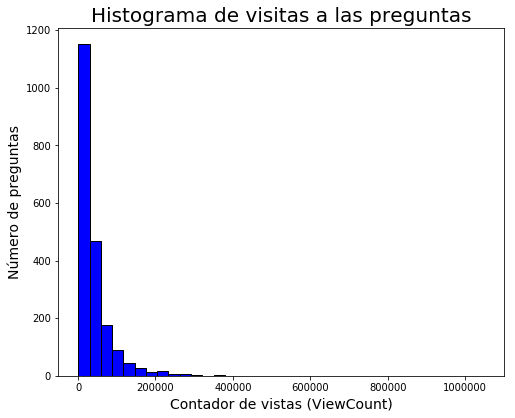

In [21]:
# Definimos el tamaño de la imagen
width=8 # inch
aspect=0.8 # height/width ratio
height = width*aspect
plt.figure(figsize=(width, height ))

# Presentamos el histograma
plt.hist(dfPython['ViewCount'], color = 'blue', edgecolor = 'black',bins = int(180/5))

# añadimos etiquetas
plt.title('Histograma de visitas a las preguntas', size = 20)
plt.xlabel('Contador de vistas (ViewCount)', size = 14)
plt.ylabel('Número de preguntas', size = 14)

<p>A continuación haemos la misma presentación con la librería  <b><i>seaborn</i></b>, en la que además presentamos la curva de densidad de la distribución.</p>

In [22]:
# Definimos el tamaño de la imagen
width=8 # inch
aspect=0.8 # height/width ratio
height = width*aspect
plt.figure(figsize=(width, height ))

# Presentamos el histograma con la libreria Seaborn 
sns.distplot(dfPython['ViewCount'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# añadimos etiquetas
plt.title('Histograma de visitas a las preguntas', size = 20)
plt.xlabel('Contador de vistas (ViewCount)', size = 14)
plt.ylabel('Número de preguntas', size = 14)

Text(0, 0.5, 'Número de preguntas')

<p>Con ambas presentaciones podemos verificar que la distribución tiene una clara asimetría <b>positiva</b>.</p>
<p>Los datos generales y el coeficiente de simetria, a continuacion, nos lo corroboran. Además finalmente presentamos un <b>diagrama de box-plot</b> que lo confirma.<p>

In [23]:
dfPython['ViewCount'].describe()
stats.skew(dfPython['ViewCount'])

6.080749992835481

{'whiskers': [<matplotlib.lines.Line2D at 0x1fff3c1b5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fff3c1bc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fff3c1b1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fff3c25320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fff3c25668>],
 'means': []}

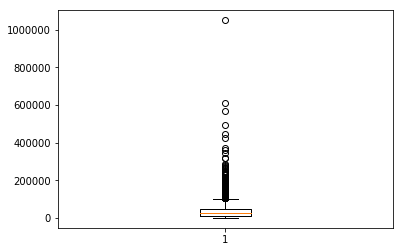

In [24]:
plt.boxplot(dfPython['ViewCount'])

# Incluir columnas adicionales obteniendo información del API sobre la respuesta más valorada a cada pregunta

<p>Se va a realizar una consulta mediante un bucle <b><i>for</i></b> preguntandole al API con una lista de los ID de las preguntas del dataframe. Con esto se obtiene un nuevo dataframe sobre el que se puede realizar una simplificación y busqueda.</p>
<p>Los datos que se pretenden tomar para cada pregunta son:</p>

<ul>
<li><b>Identificador de la respuesta más valorada (IDAnswer):</b> Se extrae de ['answer_id']</li>
<li><b>Puntuación (ScoreAnswer):</b> Se extrae de ['score']</li>
<li><b>Fecha en la que se creó (DateAnswer):</b> Se extrae de ['creation_date']</li>
<li><b>Identificador del usuario (IDUserAnswer):</b> Se extrae de ['owner']['user_id']</li>
<li><b>Nombre del usuario (DisplayName):</b> Se extrae de ['owner']['display_name']</li>    
<li><b>Reputacion (ReputationIDUserAnswer):</b> Se extrae de ['owner']['reputation']</li> 
</ul>
<p>En primer lugar gestionamos el acceso a <b>stackexchange</b> para preguntar sobre las respuestas que se hayan dado a las preguntas, que vamos a extraer en un objeto tipo <i>list</i>. Estos accesos se hacen mediante un bucle de 100 preguntas, ya que si se hace en cantidad superior se bloquea la respuesta de <b>StackAPI</b>.

In [25]:
answers_0 = SITE.fetch('/questions/{ids}/answers', 
                       min=20, 
                       ids = dfPython['IDQuestion'][0:100].tolist()
                       )

qlist_0 = answers_0['items']
df_0 = pd.DataFrame(qlist_0)

for i in range(101, len(dfPython), 100):
    end = i+99
    answers_next = SITE.fetch('/questions/{ids}/answers', 
                              min=20, 
                              ids = dfPython['IDQuestion'][i:end].tolist()
                              )
    qlist_next = answers_next['items']
    df_next = pd.DataFrame(qlist_next)
    
    frames=[df_0, df_next]
    df_0 = pd.concat(frames)

df_0.head()

answer_id  community_owned_date  creation_date  is_accepted  \
0   53862445                   NaN     1545280396        False   
1   54755536                   NaN     1550524841        False   
2   54743038                   NaN     1550478179        False   
3   29099439                   NaN     1426596311         True   
4   49318899                   NaN     1521197278        False   

   last_activity_date  last_edit_date  \
0          1550543333    1.550543e+09   
1          1550524841             NaN   
2          1550478179             NaN   
3          1550353217    1.550353e+09   
4          1550143213    1.550143e+09   

                                               owner  question_id  score  
0  {'reputation': 131945, 'user_id': 4909087, 'us...     29530232      2  
1  {'reputation': 152, 'user_id': 3571619, 'user_...     31684375      0  
2  {'reputation': 2994, 'user_id': 1965509, 'user...     27835619      0  
3  {'reputation': 23235, 'user_id': 157176, 'user...     29099404    382  
4  {'reputation': 1990, 'user_id': 1416144, 'user...     30081275     11

<p>A continuación se extraen los datos del propietario 'owner', que están encapsulados en el primer dataframe.</p>

In [26]:
owner_0 = pd.DataFrame(df_0['owner'].values.tolist())
owner_0.head()

accept_rate       display_name  \
0         97.0          coldspeed   
1          NaN  HassanSh__3571619   
2        100.0      Snehal Parmar   
3          NaN              plaes   
4         52.0    Sławomir Lenart   

                                                link  \
0  https://stackoverflow.com/users/4909087/coldspeed   
1  https://stackoverflow.com/users/3571619/hassan...   
2  https://stackoverflow.com/users/1965509/snehal...   
3       https://stackoverflow.com/users/157176/plaes   
4  https://stackoverflow.com/users/1416144/s%c5%8...   

                                       profile_image  reputation    user_id  \
0      https://i.stack.imgur.com/qKJ0Q.png?s=128&g=1    131945.0  4909087.0   
1  https://www.gravatar.com/avatar/13ae78011453ea...       152.0  3571619.0   
2  https://www.gravatar.com/avatar/61aa082ed9a6fc...      2994.0  1965509.0   
3  https://www.gravatar.com/avatar/e72ba9209373ae...     23235.0   157176.0   
4  https://www.gravatar.com/avatar/bab2906fe97538...      1990.0  1416144.0   

    user_type  
0  registered  
1  registered  
2  registered  
3  registered  
4  registered

<p>El siguiente paso es eliminar las columnas que no vamos a incorporar al dataframe final.</p>

In [27]:
owner_0.columns.values

array(['accept_rate', 'display_name', 'link', 'profile_image',
       'reputation', 'user_id', 'user_type'], dtype=object)

In [28]:
owner_0 = owner_0.drop(['accept_rate', 'link', 'profile_image', 'user_type'], axis=1)
owner_0.head()

display_name  reputation    user_id
0          coldspeed    131945.0  4909087.0
1  HassanSh__3571619       152.0  3571619.0
2      Snehal Parmar      2994.0  1965509.0
3              plaes     23235.0   157176.0
4    Sławomir Lenart      1990.0  1416144.0

<p>Eliminamos las columnas innecesarias del dataframe principal obtenido en la consulta.</p>

In [29]:
df_0.columns.values

array(['answer_id', 'community_owned_date', 'creation_date',
       'is_accepted', 'last_activity_date', 'last_edit_date', 'owner',
       'question_id', 'score'], dtype=object)

In [30]:
df_0 = df_0.drop(['community_owned_date', 'is_accepted', 
                  'last_activity_date', 'last_edit_date', 'owner'], axis=1)
df_0.head()

answer_id  creation_date  question_id  score
0   53862445     1545280396     29530232      2
1   54755536     1550524841     31684375      0
2   54743038     1550478179     27835619      0
3   29099439     1426596311     29099404    382
4   49318899     1521197278     30081275     11

<p>Fusionamos los dos dataframes, el principal y el del 'owner'.</p>

In [43]:
dfAnswers = pd.concat([df_0, owner_0], axis=1, join_axes=[df_0.index])
dfAnswers.head()

answer_id  creation_date  question_id  score       display_name  \
0   53862445     1545280396     29530232      2          coldspeed   
1   54755536     1550524841     31684375      0  HassanSh__3571619   
2   54743038     1550478179     27835619      0      Snehal Parmar   
3   29099439     1426596311     29099404    382              plaes   
4   49318899     1521197278     30081275     11    Sławomir Lenart   

   reputation    user_id  
0    131945.0  4909087.0  
1       152.0  3571619.0  
2      2994.0  1965509.0  
3     23235.0   157176.0  
4      1990.0  1416144.0

<p>Ajustamos los nombres de las columnas en el dataframe ya unido.</p>

In [32]:
dfAnswers.columns.values

array(['answer_id', 'creation_date', 'question_id', 'score',
       'display_name', 'reputation', 'user_id'], dtype=object)

In [34]:
sequence_0 = {'answer_id': 'IDAnswer', 
              'creation_date': 'DateAnswer', 
              'question_id': 'question_id', 
              'score': 'ScoreAnswer',
              'display_name': 'DisplayName', 
              'reputation': 'ReputationIDUserAnswer', 
              'user_id': 'IDUserAnswer'}

dfAnswers = dfAnswers.rename(columns = sequence_0)
dfAnswers.head()

IDAnswer  DateAnswer  question_id  ScoreAnswer        DisplayName  \
0  53862445  1545280396     29530232            2          coldspeed   
1  54755536  1550524841     31684375            0  HassanSh__3571619   
2  54743038  1550478179     27835619            0      Snehal Parmar   
3  29099439  1426596311     29099404          382              plaes   
4  49318899  1521197278     30081275           11    Sławomir Lenart   

   ReputationIDUserAnswer  IDUserAnswer  
0                131945.0     4909087.0  
1                   152.0     3571619.0  
2                  2994.0     1965509.0  
3                 23235.0      157176.0  
4                  1990.0     1416144.0

<p>Ahora, antes de la fusión definitiva, debemos generar un nuevo dataframe en el que se comparen los datos agrupandolos mediante el 'question_id' y además extrayendo la fila con el 'score' mayor.</p>
<p>Se genera un lista y un dataframe vacio contemplando el caso de que una consulta no nos dé ningún resultado.</p>

In [38]:
listIDQuestion = dfPython['IDQuestion'].tolist()

foo = dfAnswers.loc[ (dfAnswers['question_id']==listIDQuestion[0])]
row = foo['ScoreAnswer'].idxmax()
row

foo = foo.reset_index()
foo = foo[foo['index'] == row]

resultado = foo

emptyAnswer = foo

emptyAnswer.ix[:,:] = None

<p>Ahor hacemos la consulta...</p>

In [39]:
for token in listIDQuestion:
    #print("Procesando el token:", token)
    foo = dfAnswers.loc[ (dfAnswers['question_id']==token)]
    #print(foo.head())
    
    if foo.empty:
        frames = [resultado, emptyAnswer]
        emptyAnswer['question_id'] = token
    else:
        row = foo['ScoreAnswer'].idxmax()
        #print("LA fila con el valor maximo es: ", row)
        foo = foo.reset_index()
        foo = foo[foo['index'] == row]
        frames = [resultado, foo]
    
    resultado = pd.concat(frames) 

<p>Finalmente hacemos algunos ajustes al dataframe y lo presentamos con los datos obtenidos.</p>

In [40]:
# borramos primera fila
resultado = resultado.reset_index()
resultado = resultado.drop(resultado.index[[0]])

# borramos columnas
cols = [0, 1]
resultado.drop(resultado.columns[cols],axis=1,inplace=True)

# reasignamos indices
resultado = resultado.reset_index()
cols = [0]
resultado.drop(resultado.columns[cols],axis=1,inplace=True)

resultado.head()

IDAnswer    DateAnswer  question_id  ScoreAnswer      DisplayName  \
0  30081318.0  1.430926e+09   30081275.0       1574.0  Martijn Pieters   
1  27909082.0  1.421090e+09   27885397.0        817.0         kpierce8   
2  30216156.0  1.431523e+09   30216000.0        686.0  Martijn Pieters   
3  41573588.0  1.484066e+09   41573587.0        790.0            Flimm   
4  31421411.0  1.436934e+09   31421379.0        716.0           Yu Hao   

   ReputationIDUserAnswer  IDUserAnswer  
0                713277.0      100297.0  
1                  9555.0       76235.0  
2                713277.0      100297.0  
3                 53058.0      247696.0  
4                 97910.0     1009479.0

<p>Por ultimo, y siendo el resultado necesario de esta parte del ejericio, realizamos una unión mediante la función 'merge', y fusionamos ambas tablas tomando como <b>'key'</b> de la fusión las columnas <b>'IDQuestion'</b> y <b>'question_id'</b>.</p>

In [42]:
dfPythonMerged = pd.merge(dfPython, resultado,  how='left', left_on=['IDQuestion'], right_on = ['question_id'])

cols = [11]
dfPythonMerged.drop(dfPythonMerged.columns[cols],axis=1,inplace=True)

dfPythonMerged.head()

IDUser  IDQuestion                                              Title  \
0  2437514.0    30081275  Why is &quot;1000000000000000 in range(1000000...   
1  1054939.0    27885397  How do I install a Python package with a .whl ...   
2  3408500.0    30216000                      Why is [] faster than list()?   
3   247696.0    41573587  What is the difference between venv, pyvenv, p...   
4  4232487.0    31421379  Why does &quot;not(True) in [False, True]&quot...   

   IsAnswered  ViewCount  CreationDate  Reputation    UserType  AnswerCount  \
0        True     135140    1430926363     15667.0  registered            9   
1        True    1049132    1420966114      5608.0  registered           15   
2        True      68067    1431522982      3427.0  registered            5   
3        True     100279    1484065663     53058.0  registered            3   
4        True      28776    1436933578      2542.0  registered            8   

     IDAnswer    DateAnswer  ScoreAnswer      DisplayName  \
0  30081318.0  1.430926e+09       1574.0  Martijn Pieters   
1  27909082.0  1.421090e+09        817.0         kpierce8   
2  30216156.0  1.431523e+09        686.0  Martijn Pieters   
3  41573588.0  1.484066e+09        790.0            Flimm   
4  31421411.0  1.436934e+09        716.0           Yu Hao   

   ReputationIDUserAnswer  IDUserAnswer  
0                713277.0      100297.0  
1                  9555.0       76235.0  
2                713277.0      100297.0  
3                 53058.0      247696.0  
4                 97910.0     1009479.0

<p>Como se puede verificar, en el dataset definitivo se encuentran unidos los datos del dataframe original de las preguntas y el de las respuestas, con los datos (columnas) que se pedían como mínimo, y tambien algunas adicionales que nos han parecido interesantes para una posible evaluación posterior.</p>

# Extraer todos los usuarios diferentes que aparecen, y obtener el usuario de mayor y de menor reputación

<p>En este paso, vamos a  extraer todos los usuarios diferentes que aparecen, y obtener el usuario de mayor y de menor reputación.</p>
<p>Aunque podemos hacerlo sobre el dataframe original con todas las preguntas, vamos a utilizar el último dataframe con los resultados completos.</p>
<p>Utilizaremos un proceso semejante al ya utilizado anteriormente para unión de dataframes, pero esta vez con <b>'IDUser'</b> y <b>'Reputation'</b> como las columnas sobre las que hay que seleccionar y comparar.</p>

In [44]:
# Creamos una lista de usuarios diferentes
listIDUsers = dfPythonMerged['IDUser'].tolist()

uniqueList = []

for user in listIDUsers:
    if user not in uniqueList:
        uniqueList.append(user)

foo = dfPythonMerged.loc[ (dfPythonMerged['IDUser']==uniqueList[0])]
row = foo['Reputation'].idxmax()
row

foo = foo.reset_index()
foo = foo[foo['index'] == row]

resultado = foo

emptyAnswer = foo

emptyAnswer.ix[:,:] = None

<p>Despues de extraer la lista y seleccionar los usuarios únicos, pasamos a realizar una 'criba' por si hubiera discrepancias en el dataframe origina. No es de esperar, pero este proceso elimina la incertidumbre.</p>

In [45]:
for token in uniqueList:
    #print("Procesando el token:", token)
    foo = dfPythonMerged.loc[ (dfPythonMerged['IDUser']==token)]
    #print(foo.head())
    
    if foo.empty:
        frames = [resultado, emptyAnswer]
        emptyAnswer['IDUser'] = token
    else:
        row = foo['Reputation'].idxmax()
        #print("LA fila con el valor maximo es: ", row)
        foo = foo.reset_index()
        foo = foo[foo['index'] == row]
        frames = [resultado, foo]
    
    resultado = pd.concat(frames) 
    
resultado.head()

index     IDUser  IDQuestion  \
0    NaN        NaN         NaN   
0    0.0  2437514.0  30081275.0   
0    1.0  1054939.0  27885397.0   
0    2.0  3408500.0  30216000.0   
0    3.0   247696.0  41573587.0   

                                               Title  IsAnswered  ViewCount  \
0                                               None         NaN        NaN   
0  Why is &quot;1000000000000000 in range(1000000...         1.0   135140.0   
0  How do I install a Python package with a .whl ...         1.0  1049132.0   
0                      Why is [] faster than list()?         1.0    68067.0   
0  What is the difference between venv, pyvenv, p...         1.0   100279.0   

   CreationDate  Reputation    UserType  AnswerCount    IDAnswer  \
0           NaN         NaN        None          NaN         NaN   
0  1.430926e+09     15667.0  registered          9.0  30081318.0   
0  1.420966e+09      5608.0  registered         15.0  27909082.0   
0  1.431523e+09      3427.0  registered          5.0  30216156.0   
0  1.484066e+09     53058.0  registered          3.0  41573588.0   

     DateAnswer  ScoreAnswer      DisplayName  ReputationIDUserAnswer  \
0           NaN          NaN             None                     NaN   
0  1.430926e+09       1574.0  Martijn Pieters                713277.0   
0  1.421090e+09        817.0         kpierce8                  9555.0   
0  1.431523e+09        686.0  Martijn Pieters                713277.0   
0  1.484066e+09        790.0            Flimm                 53058.0   

   IDUserAnswer  
0           NaN  
0      100297.0  
0       76235.0  
0      100297.0  
0      247696.0

<p>Limpiamos y ajustamos la matriz de resultados para hacer la consulta sobre un dataframe en correco estado.</p>

In [46]:
# borramos primera fila
resultado = resultado.reset_index()
resultado = resultado.drop(resultado.index[[0]])

# borramos columnas
cols = [0, 1]
resultado.drop(resultado.columns[cols],axis=1,inplace=True)

# reasignamos indices
resultado = resultado.reset_index()
cols = [0]
resultado.drop(resultado.columns[cols],axis=1,inplace=True)

resultado.head()

IDUser  IDQuestion                                              Title  \
0  2437514.0  30081275.0  Why is &quot;1000000000000000 in range(1000000...   
1  1054939.0  27885397.0  How do I install a Python package with a .whl ...   
2  3408500.0  30216000.0                      Why is [] faster than list()?   
3   247696.0  41573587.0  What is the difference between venv, pyvenv, p...   
4  4232487.0  31421379.0  Why does &quot;not(True) in [False, True]&quot...   

   IsAnswered  ViewCount  CreationDate  Reputation    UserType  AnswerCount  \
0         1.0   135140.0  1.430926e+09     15667.0  registered          9.0   
1         1.0  1049132.0  1.420966e+09      5608.0  registered         15.0   
2         1.0    68067.0  1.431523e+09      3427.0  registered          5.0   
3         1.0   100279.0  1.484066e+09     53058.0  registered          3.0   
4         1.0    28776.0  1.436934e+09      2542.0  registered          8.0   

     IDAnswer    DateAnswer  ScoreAnswer      DisplayName  \
0  30081318.0  1.430926e+09       1574.0  Martijn Pieters   
1  27909082.0  1.421090e+09        817.0         kpierce8   
2  30216156.0  1.431523e+09        686.0  Martijn Pieters   
3  41573588.0  1.484066e+09        790.0            Flimm   
4  31421411.0  1.436934e+09        716.0           Yu Hao   

   ReputationIDUserAnswer  IDUserAnswer  
0                713277.0      100297.0  
1                  9555.0       76235.0  
2                713277.0      100297.0  
3                 53058.0      247696.0  
4                 97910.0     1009479.0

<p>Y, finalmente, procedemos a pedir al dataframe que nos entrega el usuario con mayor reputacion.</p>

In [47]:
# El usuario con mayor reputacon
resultado.loc[resultado['Reputation'].idxmax()]

IDUser                                            476
IDQuestion                                3.15902e+07
Title                     Monkey patching a @property
IsAnswered                                          1
ViewCount                                        3061
CreationDate                              1.43766e+09
Reputation                                     395769
UserType                                    moderator
AnswerCount                                         6
IDAnswer                                  3.15916e+07
DateAnswer                                1.43766e+09
ScoreAnswer                                        15
DisplayName                          Andrzej Pronobis
ReputationIDUserAnswer                          17679
IDUserAnswer                               1.5766e+06
Name: 1170, dtype: object